In [1]:
# code for loading the format for the notebook
import os

# path : store the current path to convert back to it later
path = os.getcwd()
os.chdir( os.path.join('..', 'notebook_format') )
from formats import load_style
load_style(css_style = 'custom2.css')

In [2]:
os.chdir(path)
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 6 # change default figure size

# 1. magic to print version
# 2. magic so that the notebook will reload external python modules
%load_ext watermark
%load_ext autoreload 
%autoreload 2

%watermark -a 'Ethen' -d -t -v -p numpy,pandas,matplotlib,scikit-learn

Ethen 2016-11-24 12:36:59 

CPython 3.5.2
IPython 4.2.0

numpy 1.11.2
pandas 0.18.1
matplotlib 1.5.1
scikit-learn 0.18


LDA's objective is very similar to a Principal Component Analysis (PCA), to perform dimensionality reduction. The main difference between the two methods is:

PCA can be described as an “unsupervised” algorithm, since it "ignores" class labels and its goal is to find the directions (principal components) that maximize the variance in our dataset. In contrast to PCA, LDA is "supervised" and computes the directions (linear discriminants) that maximizes the separation between multiple classes. Meaning in LDA, we want to preserve as much of the class discriminatory information as possible.

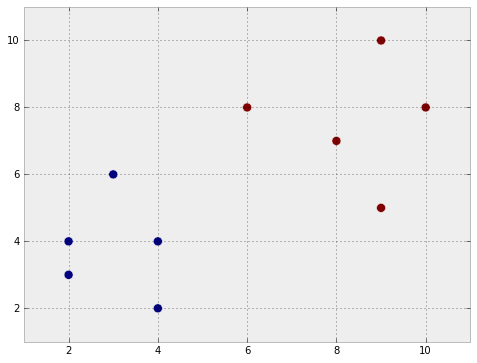

In [3]:
n_class = 2
n_feature = 2
X = np.array([
    [4, 2],
    [2, 4],
    [2, 3],
    [3, 6],
    [4, 4],
    [9, 10],
    [6, 8],
    [9, 5],
    [8, 7],
    [10, 8]
])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

plt.scatter(X[:, 0], X[:, 1], c = y, s = 80)
plt.show()

In [4]:
mean_vectors = np.zeros((n_class, n_feature))
for cl in range(n_class):
    mean_vectors[cl] = np.mean( X[y == cl], axis = 0 )
    print( 'Mean Vector class %s: %s\n' % ( cl, mean_vectors[cl] ) )

Mean Vector class 0: [ 3.   3.8]

Mean Vector class 1: [ 8.4  7.6]



In [5]:
# compute scatter/covariance matrix for one class
# and match the results with np.cov function
mv = mean_vectors[0]
row = X[y == 0]
diff = row - mv
diff.T.dot(diff) / (row.shape[0] - 1)

array([[ 1.  , -0.25],
       [-0.25,  2.2 ]])

In [6]:
# for np.cov, rowvar = False, 
# indicates that the rows represents obervation
np.cov( X[y == 0], rowvar = False )

array([[ 1.  , -0.25],
       [-0.25,  2.2 ]])

In [7]:
S_W = np.zeros(( n_class, n_feature ))
for cl in range(n_class):
    mv = mean_vectors[cl]
    row = X[y == cl]
    diff = row - mv
    cl_scatter_m = diff.T.dot(diff) / (row.shape[0] - 1)
    S_W += cl_scatter_m
    
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 3.3 -0.3]
 [-0.3  5.5]]


In [8]:
overall_mean = np.mean(X, axis = 0)
mv = mean_vectors[0]
diff = (mv - overall_mean)[:, np.newaxis]
diff.dot(diff.T)

array([[ 7.29,  5.13],
       [ 5.13,  3.61]])

In [15]:
overall_mean = np.mean(X, axis = 0)

S_B = np.zeros(( n_class, n_feature ))
for cl in range(n_class):
    mv = mean_vectors[cl]
    n_row = X[y == cl].shape[0] - 1 ## ??
    diff = (mv - overall_mean)[:, np.newaxis]
    cl_scatter_m = diff.dot(diff.T)
    S_B += n_row * cl_scatter_m
    
S_B = S_B / 2 ## ??
S_B

array([[ 29.16,  20.52],
       [ 20.52,  14.44]])

In [23]:
S_W

array([[ 3.3, -0.3],
       [-0.3,  5.5]])

In [18]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [33]:
eig_vecs[:, 0]

array([ 0.90878558,  0.41726342])

In [31]:
X.dot(eig_vecs[:, 0])

array([  4.46966918,   3.48662485,   3.06936143,   5.22993727,
         5.30419602,  12.35170446,   8.79082087,  10.26538736,
        10.19112861,  12.4259632 ])

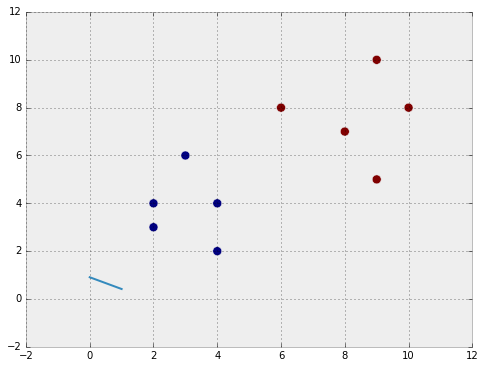

In [32]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 80)
plt.plot(eig_vecs[:, 0])
plt.show()

In [17]:


for i in range(len(eig_vals)):
    #eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

NameError: name 'eigvec_sc' is not defined

In [10]:
from sklearn import datasets

"""
n_class = 3
n_feature = 4
iris = datasets.load_iris()
X = iris.data
y = iris.target
"""

'\nn_class = 3\nn_feature = 4\niris = datasets.load_iris()\nX = iris.data\ny = iris.target\n'